In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV



df = pd.read_csv("./Heart_Disease.csv")

le_thal = LabelEncoder()
le_ca = LabelEncoder()

df['thal_n'] = le_thal.fit_transform(df['thal'])
df['ca_n'] = le_ca.fit_transform(df['ca'])

df.drop(['thal','ca'],axis='columns',inplace=True)
cv_scores2 = cross_val_score(model2,inputs,target, cv=5)  # Use 5-fold cross-validation

inputs = df.drop('hd',axis='columns')
target = df['hd']

model =  DecisionTreeClassifier(criterion='gini')
X_train,X_test,Y_train,Y_test = train_test_split(inputs,target,test_size=0.2)
model.fit(X_train,Y_train)


DecisionTreeClassifier()

19 9
5 28
[[28  9]
 [ 5 19]]
Average Cross-Validation Score: 0.7555737704918033


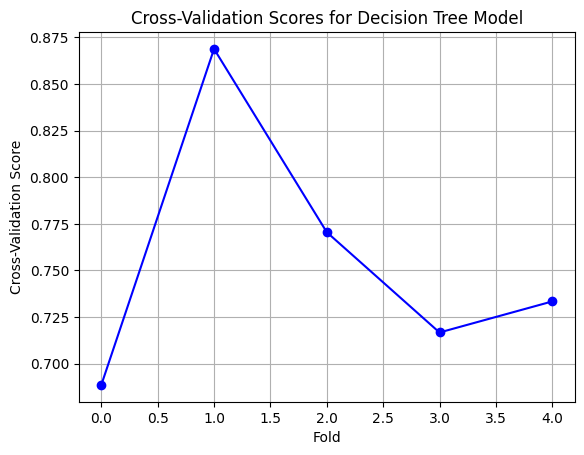

In [2]:
Y_pred = model.predict(X_test)

def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp,fp,fn,tn

tp,fp,fn,tn  = calculate_metrics(Y_test,Y_pred)

print(tp,fp)
print(fn,tn)


cm = confusion_matrix(Y_test, Y_pred)
print(cm)

# Cross-validation to estimate model generalizability
cv_scores = cross_val_score(model,inputs,target, cv=5)  # Use 5-fold cross-validation

# Print the average cross-validation score
print("Average Cross-Validation Score:", cv_scores.mean())

# Plot the scores as a line chart
plt.plot(cv_scores, marker='o', color='b')

# Set labels and title
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Decision Tree Model')

# Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()



0.8524590163934426
[[32  5]
 [ 4 20]]
20 5
4 32
Average Cross-Validation Score: 0.8018032786885246


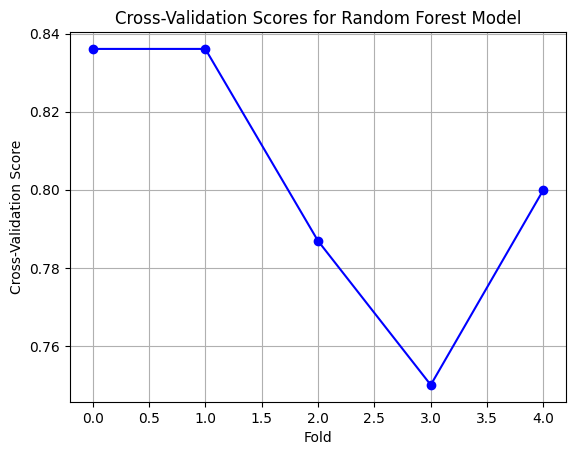

In [3]:

model2 = RandomForestClassifier(n_estimators=10)

model2.fit(X_train,Y_train)

print(model2.score(X_test,Y_test))

Y_pred2 = model2.predict(X_test)

cm2 = confusion_matrix(Y_test,Y_pred2)

print(cm2)

tp1,fp1,fn1,tn1  = calculate_metrics(Y_test,Y_pred2)

print(tp1,fp1)
print(fn1,tn1)


cv_scores2 = cross_val_score(model2,inputs,target, cv=5)  # Use 5-fold cross-validation

# Print the average cross-validation score
print("Average Cross-Validation Score:", cv_scores2.mean())

# Plot the scores as a line chart
plt.plot(cv_scores2, marker='o', color='b')

# Set labels and title
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Random Forest Model')

# Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [4]:
# Get feature importances
feature_importances = model2.feature_importances_

# Print feature importances (sorted by importance)
sorted_idx = feature_importances.argsort()[::-1]
print("Feature Importances:")
for f, idx in enumerate(sorted_idx):
    print("%s: %.3f" % (inputs.columns[idx], feature_importances[idx]))




print("Classification Report:")
print(classification_report(Y_test, Y_pred2))


Feature Importances:
cp: 0.133
thal_n: 0.126
thalach: 0.114
age: 0.103
oldpeak: 0.101
ca_n: 0.098
restbp: 0.094
chol: 0.071
exang: 0.048
sex: 0.040
slope: 0.031
restecg: 0.028
fbs: 0.013
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.80      0.83      0.82        24

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [5]:

# Define a parameter grid to search
param_grid = {
    'n_estimators': [50,100,150],  # Number of trees
    'max_depth': [4, 8, 12],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100}
Best Cross-Validation Score: 0.8342687074829932
